### Problem Statement
You are a data scientist working for a school

You are asked to predict the GPA of the current students based on the following provided data: 

 0   StudentID  int64  
 1   Age    int64  
 2   Gender int64  
 3   Ethnicity  int64  
 4   ParentalEducation  int64  
 5   StudyTimeWeekly    float64
 6   Absences   int64  
 7   Tutoring   int64  
 8   ParentalSupport    int64  
 9   Extracurricular    int64  
 10  Sports int64  
 11  Music  int64  
 12  Volunteering   int64  
 13  GPA    float64
 14  GradeClass float64

The GPA is the Grade Point Average, typically ranges from 0.0 to 4.0 in most educational systems, with 4.0 representing an 'A' or excellent performance.

The minimum passing GPA can vary by institution, but it's often around 2.0. This usually corresponds to a 'C' grade, which is considered satisfactory.

You need to create a Deep Learning model capable to predict the GPA of a Student based on a set of provided features.
The data provided represents 2,392 students.

In this excersice you will be requested to create a total of three models and select the most performant one.


### 1) Import Libraries

First let's import the following libraries, if there is any library that you need and is not in the list bellow feel free to include it

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


### 2) Load Data

- You will be provided with a cvs (comma separated value) file.
- You will need to add that file into a pandas dataframe, you can use the following code as reference
- The file will be available in canvas

In [69]:
data = pd.read_csv("Student_performance_data _.csv")
data

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


### 3) Review you data:

Make sure you review your data.
Place special attention of null or empty values.

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


### 4. Remove the columns not needed for Student performance prediction

- Choose only the columns you consider to be valuable for your model training.
- For example, StudentID might not be a good feature for your model, and thus should be removed from your main dataset, which other columns should also be removed?
- You can name that final dataset as 'dataset'

In [71]:
dataset = data.drop(["StudentID", "Extracurricular", "Ethnicity", "Volunteering"], axis=1)

### 5. Check if the columns has any null values:
- Here you now have your final dataset to use in your model training.
- Before moving foward review your data check for any null or empty value that might be needed to be removed

In [72]:
dataset.isnull().sum()

Age                  0
Gender               0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Sports               0
Music                0
GPA                  0
GradeClass           0
dtype: int64

### 6. Prepare your data for training and for testing set:
 - First create a dataset named X, with all columns but GPA. These are the features
 - Next create another dataset named y, with only GPA column. This is the label
 - If you go to your Imports, you will see the following import: **'from sklearn.model_selection import train_test_split'**
 - Use that *train_test_split* function to create: X_train, X_test, y_train and y_test respectively. Use X and y datasets as parameters. Other parameters to use are: Test Size = 0.2, Random State = 42.
 
 - Standarize your features (X_train and X_test) by using the StandardScaler (investigate how to use fit_transform and transform functions). This will help the training process by dealing with normilized data.

 Note: Your X_train shape should be around (1913, 10). This means the dataset has 10 columns which should be the input.

In [73]:
X = dataset.drop(columns="GPA")
y = dataset["GPA"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [74]:
X_train.shape

(1913, 10)

### 7. Define your Deep Neural Network.
- This will be a Sequential Neural Network.
- With a Dense input layer with 64 units, and input dimention of 10 and Relu as the activation function.
- A Dense hidden layer with 32 units, and Relu as the activation function.
- And a Dense output layer with 1 unit, do not define an activation function so it defaults to linear, suitable for regression tasks. e.g. Dense(1)

This last part of the output layer is super important, since we want to predict the GPA, this means that we want a regression and not a classification. Linear activation function is best for regression and Sigmoid is best for Binary Classification

In [75]:
model = Sequential()
model.add(Dense(64, input_dim=10, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1)) 

c:\Users\erika\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 8. Compile your Neural Network
- Choose Adam as the optimizer
- And MSE as the Loss function
- Also add the following metrics: Mean Absolute Error

In [76]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

### 9. Fit (or train) your model
- Use the X_train and y_train datasets for the training
- Do 50 data iterations
- Choose the batch size = 10
- Also select a validation_split of 0.2
- Save the result of the fit function in a variable called 'history'

In [77]:
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)


Epoch 1/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3608 - mae: 0.8733 - val_loss: 0.1494 - val_mae: 0.3102
Epoch 2/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - loss: 0.1083 - mae: 0.2586 - val_loss: 0.0936 - val_mae: 0.2474
Epoch 3/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step - loss: 0.0782 - mae: 0.2239 - val_loss: 0.0747 - val_mae: 0.2221
Epoch 4/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0679 - mae: 0.2073 - val_loss: 0.0675 - val_mae: 0.2117
Epoch 5/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - loss: 0.0552 - mae: 0.1885 - val_loss: 0.0645 - val_mae: 0.2059
Epoch 6/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0473 - mae: 0.1726 - val_loss: 0.0615 - val_mae: 0.1991
Epoch 7/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step - loss: 0.0451 - mae: 0.1707 - val_loss: 0.0589 - val_mae: 0.1931
Epoch 8/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step - loss: 0.0454 - mae: 0.1694 - val_loss: 0.0573 - val_mae: 0.1932
Epoch 9/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 995

### 10. View your history variable:
- Use Matplotlib.pyplot to show graphs of your model traning history
- In one graph:
   - Plot the Training Loss and the Validation Loss
   - X Label = Epochs
   - Y Label = Loss
   - Title = Training and Validation Loss over Epochs
- In a second graph:
   - Plot the Training MAE and the Validation MAE
   - X Label = Epochs
   - Y Label = Mean Absolute Error (MAE)
   - Title = Training and Validation MAE over Epochs

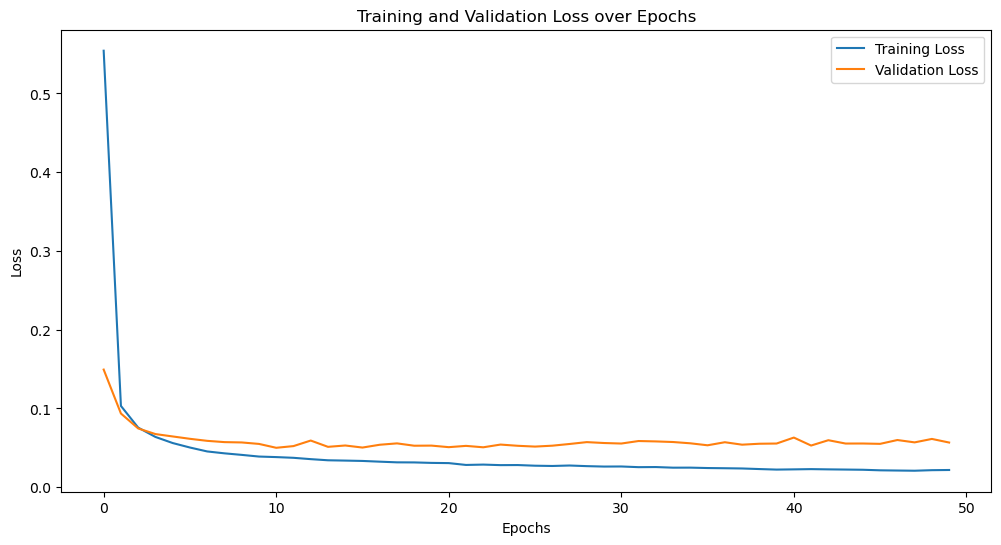

In [78]:
#  Gráfico de Pérdida
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

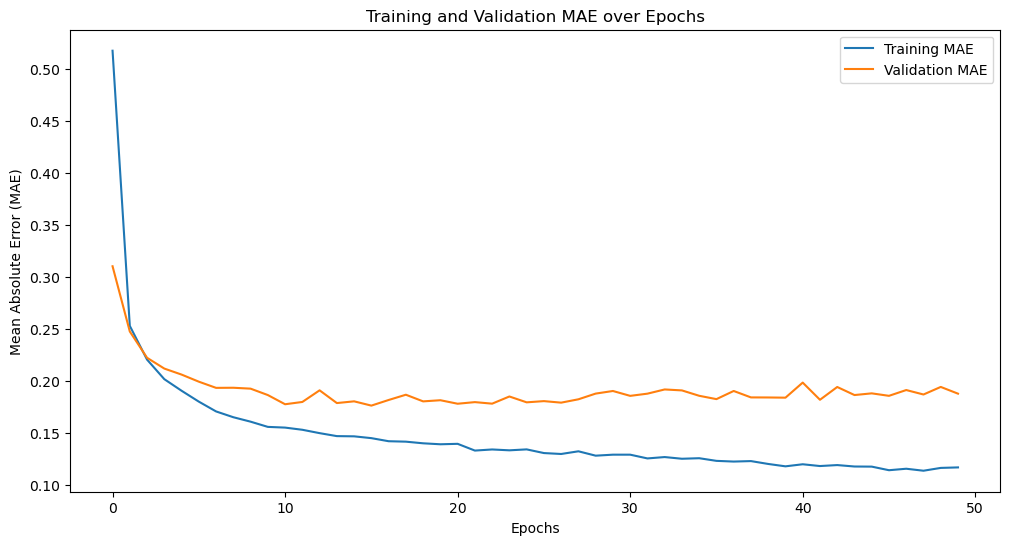

In [79]:
# Gráfico de MAE
plt.figure(figsize=(12, 6))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Training and Validation MAE over Epochs')
plt.legend()
plt.show()

### 11. Evaluate your model:
- See the result of your loss function.
- What can you deduct from there?

In [80]:
loss = model.evaluate(X_test, y_test)
print(f'Pérdida en el conjunto de prueba: {loss}')

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - loss: 0.0645 - mae: 0.1989
Pérdida en el conjunto de prueba: [0.056993596255779266, 0.18703784048557281]


### 12. Use your model to make some predictions:
- Make predictions of your X_test dataset
- Print the each of the predictions and the actual value (which is in y_test)
- How good was your model?

In [81]:
predictions = model.predict(X_test)

# Imprimir cada predicción y el valor real
for i in range(len(predictions)):
    print(f'Predicción: {predictions[i][0]}, Valor Real: {y_test.iloc[i]}')

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Predicción: 1.5329639911651611, Valor Real: 1.4277243762746905
Predicción: 3.0568721294403076, Valor Real: 3.117354434785501
Predicción: 1.949293613433838, Valor Real: 2.037768574636005
Predicción: 3.5541908740997314, Valor Real: 3.5485205508668662
Predicción: 0.5320760011672974, Valor Real: 0.2489771312307257
Predicción: 2.700713634490967, Valor Real: 2.627693905554347
Predicción: 1.6548428535461426, Valor Real: 2.057378500596372
Predicción: 2.2774555683135986, Valor Real: 2.248337588471201
Predicción: 2.373671054840088, Valor Real: 2.1947065208246226
Predicción: 1.0883333683013916, Valor Real: 0.7581829737450007
Predicción: 2.997342348098755, Valor Real: 2.370893096932428
Predicción: 0.499575138092041, Valor Real: 0.7664048694920337
Predicción: 2.729832410812378, Valor Real: 2.952721567213245
Predicción: 2.7471985816955566, Valor Real: 2.3433313526833226
Predicción: 2.742464780807495, Valor Real: 2.7718106588704914
Predicción: 0.359296798706054

### 13. Compete against this model:
- Create two more different models to compete with this model
- Here are a few ideas of things you can change:
   - During Dataset data engineering:
      - You can remove features that you think do not help in the training and prediction 
      - Feature Scaling: Ensure all features are on a similar scale (as you already did with StandardScaler)
   - During Model Definition:
      - You can change the Model Architecture (change the type or number of layers or the number of units)
      - You can add dropout layers to prevent overfitting
   - During Model Compile:
      - You can try other optimizer when compiling your model, here some optimizer samples: Adam, RMSprop, or Adagrad.
      - Try another Loss Function
   - During Model Training:
      - Encrease the number of Epochs
      - Adjust the size of your batch
- Explain in a Markdown cell which changes are you implementing
- Show the comparison of your model versus the original model
   
   

#### Model 2:
- Changes:
    - Added dropout layers after each dense layer to prevent overfitting.
    - Changed the optimizer from Adam to RMSprop.
    - Kept the original architecture but adjusted the batch size to 15 and epochs to 100 for more training.

In [82]:
# Model 2: Adding Dropout and using RMSprop optimizer
model_2 = Sequential()
model_2.add(Dense(64, input_dim=10, activation='relu'))
model_2.add(Dropout(0.3))  # Added dropout to prevent overfitting
model_2.add(Dense(32, activation='relu'))
model_2.add(Dropout(0.3))
model_2.add(Dense(1))  # Output layer for regression

# Compile the model using RMSprop optimizer
model_2.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['mae'])

# Train the model with validation_split and more epochs
history_2 = model_2.fit(X_train, y_train, epochs=100, batch_size=15, validation_split=0.2)

loss_2 = model_2.evaluate(X_test, y_test)
print(f'Pérdida en el conjunto de prueba (Model 1): {loss_2}')

predictions_2 = model_2.predict(X_test)


Epoch 1/100


c:\Users\erika\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4237 - mae: 0.9497 - val_loss: 0.2032 - val_mae: 0.3715
Epoch 2/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4299 - mae: 0.5182 - val_loss: 0.1698 - val_mae: 0.3391
Epoch 3/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4307 - mae: 0.5070 - val_loss: 0.1297 - val_mae: 0.2918
Epoch 4/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3204 - mae: 0.4449 - val_loss: 0.1138 - val_mae: 0.2761
Epoch 5/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2355 - mae: 0.3726 - val_loss: 0.0988 - val_mae: 0.2567
Epoch 6/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2405 - mae: 0.3853 - val_loss: 0.1079 - val_mae: 0.2721
Epoch 7/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2101 - mae: 0.3572 - val_loss: 0.0855 - val_mae: 0.2414
Epoch 8/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2111 - mae: 0.3570 - val_loss: 0.0729 - val_mae: 0.2178
Epoch 9/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss:

#### Model 3:
- Changes:
   - Changed the architecture by increasing the number of layers to create a deeper network.
   - Used Adagrad optimizer to compare its performance against the other optimizers.
   - Changed the loss function to mean_absolute_error instead of mean_squared_error
   - Increased the number of epochs to 80 and batch size to 20.

In [83]:
# Model 3: Deeper network and using Adagrad optimizer
model_3 = Sequential()
model_3.add(Dense(128, input_dim=10, activation='relu'))  # Increased the number of units
model_3.add(Dense(64, activation='relu'))
model_3.add(Dense(32, activation='relu'))
model_3.add(Dense(1))  # Output layer for regression

# Compile the model using Adagrad optimizer and mean_absolute_error loss
model_3.compile(optimizer='adagrad', loss='mean_absolute_error', metrics=['mae'])

# Train the model with validation_split
history_3 = model_3.fit(X_train, y_train, epochs=80, batch_size=20, validation_split=0.2)

# Evaluate the model on test data
loss_3 = model_3.evaluate(X_test, y_test)
print(f'Pérdida en el conjunto de prueba (Model 2): {loss_3}')

# Predictions for Model 2
predictions_3 = model_3.predict(X_test)


Epoch 1/80


c:\Users\erika\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.8301 - mae: 1.8301 - val_loss: 1.6835 - val_mae: 1.6835
Epoch 2/80
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.5394 - mae: 1.5394 - val_loss: 1.3909 - val_mae: 1.3909
Epoch 3/80
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2488 - mae: 1.2488 - val_loss: 1.0779 - val_mae: 1.0779
Epoch 4/80
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9606 - mae: 0.9606 - val_loss: 0.7857 - val_mae: 0.7857
Epoch 5/80
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6655 - mae: 0.6655 - val_loss: 0.5411 - val_mae: 0.5411
Epoch 6/80
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4578 - mae: 0.4578 - val_loss: 0.4438 - val_mae: 0.4438
Epoch 7/80
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3935 - mae: 0.3935 - val_loss: 0.4121 - val_mae: 0.4121
Epoch 8/80
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3608 - mae: 0.3608 - val_loss: 0.3924 - val_mae: 0.3924
Epoch 9/80
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3464 - mae: 0.3464 - va

#### Comparison

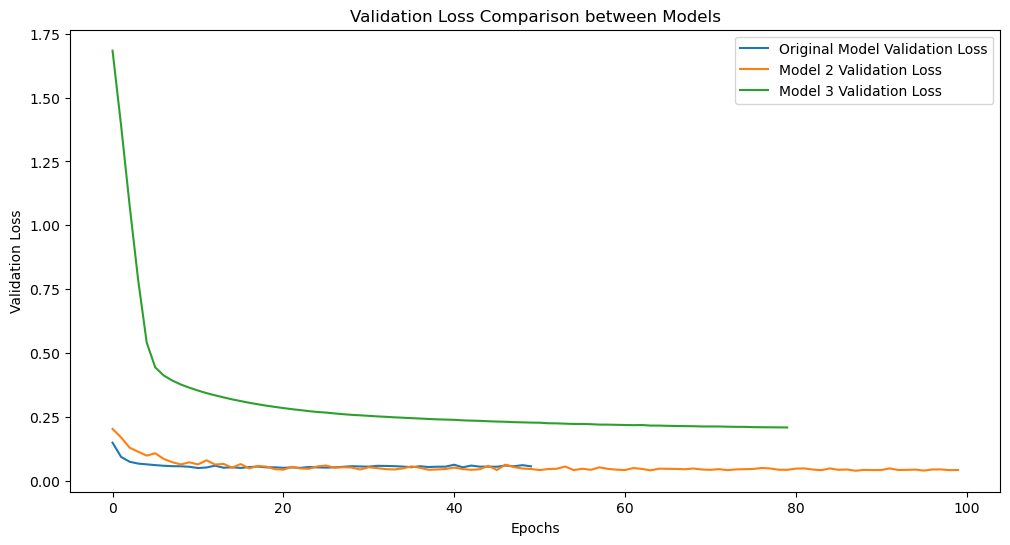

In [84]:
# Plotting the comparison of Training and Validation Loss for all models
plt.figure(figsize=(12, 6))
plt.plot(history.history['val_loss'], label='Original Model Validation Loss')
plt.plot(history_2.history['val_loss'], label='Model 2 Validation Loss')
plt.plot(history_3.history['val_loss'], label='Model 3 Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Validation Loss Comparison between Models')
plt.legend()
plt.show()


In [85]:
# Crear un diccionario con los resultados de Loss y MAE de los tres modelos
results = {
    'Model': ['Original', 'Model 2 (RMSprop + Dropout)', 'Model 3 (Adagrad + Deeper)'],
    'Test Loss': [loss[0], loss_2[0], loss_3[0]],
    'Test MAE': [loss[1], loss_2[1], loss_3[1]]
}

results_df = pd.DataFrame(results)
print(results_df)

                         Model  Test Loss  Test MAE
0                     Original   0.056994  0.187038
1  Model 2 (RMSprop + Dropout)   0.044301  0.164307
2   Model 3 (Adagrad + Deeper)   0.189443  0.189443


Of the three models evaluated, Model 2 (RMSprop + Dropout) presents the best performance in terms of error in the test set, with the lowest Test Loss (0.0443) and MAE (0.1643). This suggests that adding dropout layers and using the RMSprop optimizer helped improve model fit and reduce error.

The Model 3 (Adagrad + Deeper), despite having a deeper architecture, does not offer a significant improvement and shows a considerably higher Test Loss (0.1894) compared to the other models, indicating that this configuration could have led to overfitting or suboptimal performance in the test set.

The original model, although not as accurate as the Model 2, is still good with a Test Loss of 0.0570 and a MAE of 0.1870, values close to the Model 2.

In [87]:
num_students = 5
X_test_subset = X_test[:num_students]
y_test_subset = y_test.iloc[:num_students]

# predicciones
predictions_original = model.predict(X_test_subset)
predictions_model_2 = model_2.predict(X_test_subset)
predictions_model_3 = model_3.predict(X_test_subset)

# Crear un diccionario con los resultados de las predicciones y valores reales
predictions_data = {
    'Real GPA': y_test_subset.values,
    'Predicción Original': predictions_original.flatten(),
    'Predicción Model 2': predictions_model_2.flatten(),
    'Predicción Model 3': predictions_model_3.flatten()
}

# Convertir el diccionario a un DataFrame
predictions_df = pd.DataFrame(predictions_data)

# Mostrar la tabla con las predicciones
print(predictions_df)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
   Real GPA  Predicción Original  Predicción Model 2  Predicción Model 3
0  1.427724             1.532964            1.623835            1.560974
1  3.117354             3.056872            2.958203            3.194478
2  2.037769             1.949294            2.097304            1.783806
3  3.548521             3.554191            3.481055            3.534930
4  0.248977             0.532076            0.554813            0.701701


Although the Model 2 performs better overall on metrics, the original model seems to make better predictions in these particular cases. This could indicate that while Model 2 is more effective at reducing overall errors, the original model has more stable or accurate behavior in certain individual observations of the test set.